# Chatbot Using NLP: Week 1
# Report
## Introduction
In today's fast-paced digital world, organizations are increasingly striving to provide instant and efficient 24/7 support to their users. To address this need, our project aims to implement a chatbot using Natural Language Processing (NLP). This chatbot will automate responses to frequently asked questions (FAQs), thereby improving response time and enhancing the overall user experience.
## Problem Statement
Organizations often encounter challenges in delivering instant and efficient support around the clock. By leveraging NLP, a chatbot can automate responses to frequently asked questions, thereby addressing this issue by reducing response time and enhancing user satisfaction.
## Objectives
1. Build a Conversational Chatbot: Develop a chatbot capable of understanding and handling user queries expressed in natural language.
2. User-Friendly Integration: Integrate the chatbot into a user-friendly interface, such as a website or mobile application, for convenient access.
3. Train for Accuracy: Use machine learning techniques to train the chatbot to comprehend user intent and provide accurate responses.
4. Performance Evaluation: Assess the chatbot's performance using metrics such as accuracy, response time, and user feedback.


### Let's Start with Importing some couple of libraries

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter

# Dataset Collection Process
 Dataset has been provided as part of the project resources.


In [3]:
with open('intents.json', 'r') as fi:
    data = json.load(fi)
intents = pd.json_normalize(data)
intents.head()

,tag,patterns,responses
0,greeting,"[Hi, Hello, Hey, How are you, What's up]","[Hi there, Hello, Hey, I'm fine, thank you, No..."
1,goodbye,"[Bye, See you later, Goodbye, Take care]","[Goodbye, See you later, Take care]"
2,thanks,"[Thank you, Thanks, Thanks a lot, I appreciate...","[You're welcome, No problem, Glad I could help]"
3,about,"[What can you do, Who are you, What are you, W...","[I am a chatbot, My purpose is to assist you, ..."
4,help,"[Help, I need help, Can you help me, What shou...","[Sure, what do you need help with?, I'm here t..."


# Performing Exploratory Data Analysis
### Check basic information about the dataset

In [4]:
print(intents.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        278 non-null    object
 1   patterns   278 non-null    object
 2   responses  278 non-null    object
dtypes: object(3)
memory usage: 6.6+ KB
None


In [5]:
print(intents.isnull().sum())

tag          0
patterns     0
responses    0
dtype: int64


In [6]:
print(intents['tag'].unique())

['greeting' 'goodbye' 'thanks' 'about' 'help' 'age' 'weather' 'budget'
 'credit_score' 'name' 'favorite_color' 'hobby' 'time' 'joke' 'food'
 'movies' 'technology' 'compliment' 'meaning_of_life' 'sports' 'pets'
 'travel' 'books' 'education' 'health' 'coding' 'art' 'career'
 'technology_help' 'history' 'music' 'exercise' 'mindfulness' 'science'
 'gaming' 'positivity' 'cooking' 'relationship' 'nature' 'productivity'
 'travel_tips' 'languages' 'inspiration' 'finance_tips'
 'artificial_intelligence' 'motivation' 'future' 'movies_series'
 'self_improvement' 'robotics' 'philosophy' 'coding_languages'
 'virtual_reality' 'space_exploration' 'emotional_intelligence'
 'cybersecurity' 'creativity' 'futuristic_technology' 'entrepreneurship'
 'internet_of_things' 'universe' 'social_media' 'cuisine' 'happiness'
 'self_care' 'augmented_reality' 'global_warming' 'data_privacy'
 'positivity_quotes' 'virtual_assistant' 'emerging_technologies'
 'philanthropy' 'sustainability' 'gene_editing' 'machine_learn

In [7]:
intents['number_of_patterns'] = intents['patterns'].apply(len)
intents['number_of_responses'] = intents['responses'].apply(len)
print(intents[['tag', 'number_of_patterns', 'number_of_responses']])

                        tag  number_of_patterns  number_of_responses
0                  greeting                   5                    5
1                   goodbye                   4                    3
2                    thanks                   4                    3
3                     about                   4                    3
4                      help                   4                    3
..                      ...                 ...                  ...
273  time_travelers_journal                   3                    2
274       enchanted_stables                   3                    2
275       wizarding_cuisine                   3                    2
276       enchanted_riddles                   3                    2
277         timeless_relics                   3                    2

[278 rows x 3 columns]


### Visualization of number of patterns and responses per tag

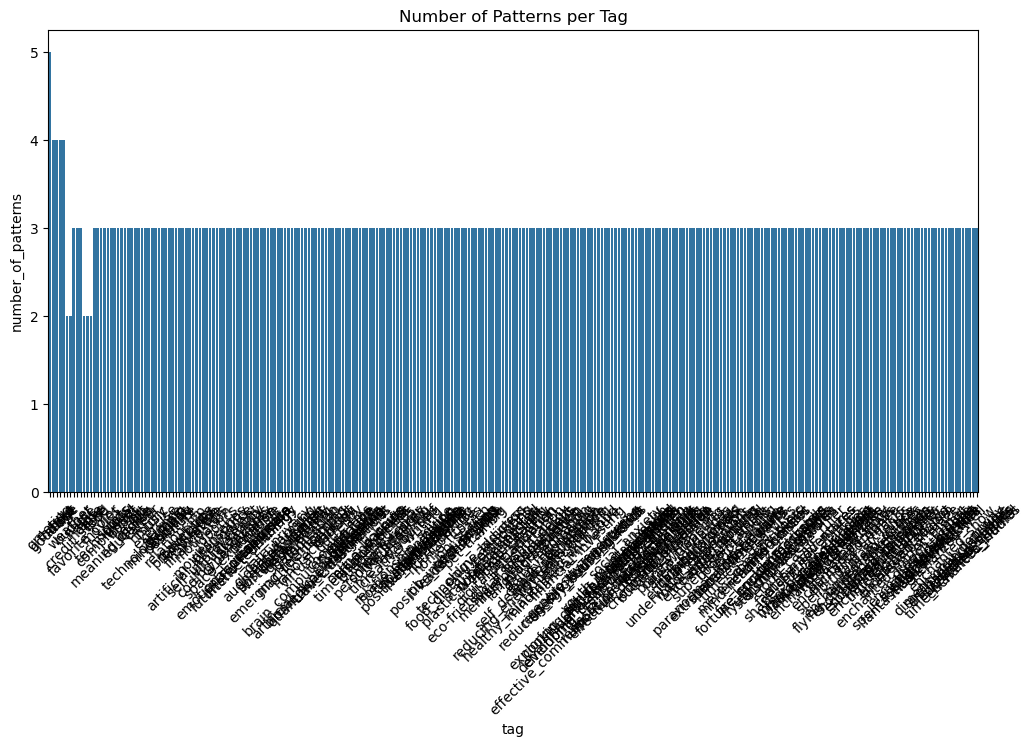

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tag', y='number_of_patterns', data=intents)
plt.title('Number of Patterns per Tag')
plt.xticks(rotation=45)
plt.show()

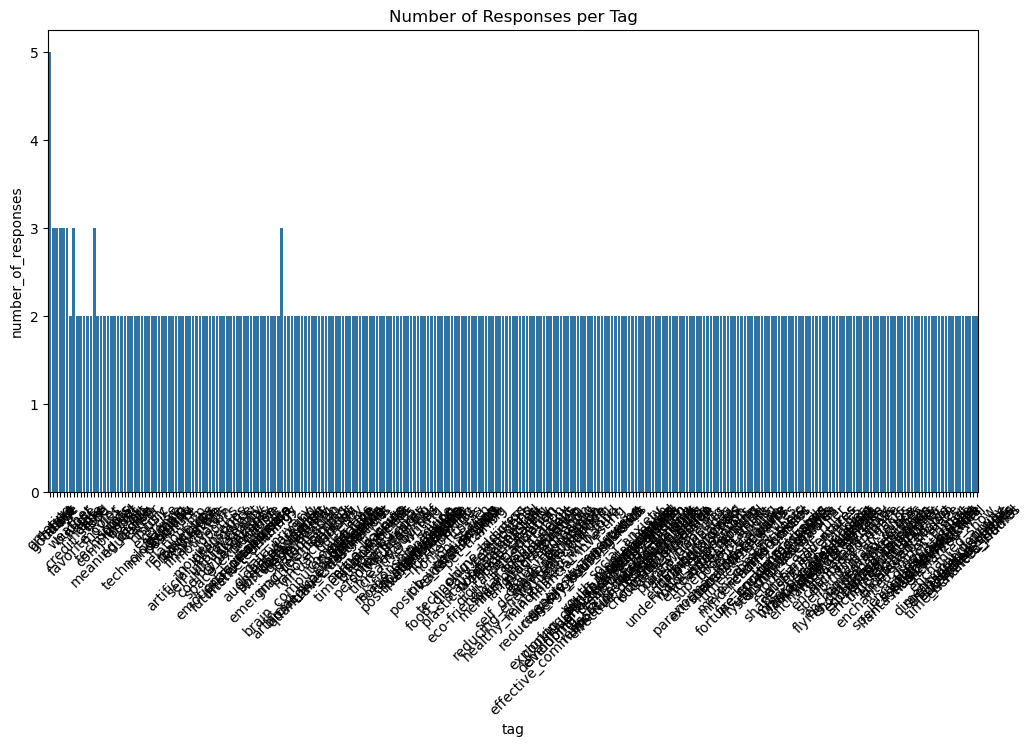

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tag', y='number_of_responses', data=intents)
plt.title('Number of Responses per Tag')
plt.xticks(rotation=45)
plt.show()

### Adding Columns for pattern and response lengths

In [10]:
intents['pattern_length'] = intents['patterns'].apply(lambda x: [len(p) for p in x])
intents['response_length'] = intents['responses'].apply(lambda x: [len(r) for r in x])
print(intents['pattern_length'] )

0      [2, 5, 3, 11, 9]
1         [3, 13, 7, 9]
2        [9, 6, 12, 15]
3      [15, 11, 12, 20]
4       [4, 11, 15, 16]
             ...       
273        [33, 35, 33]
274        [26, 35, 30]
275        [27, 31, 37]
276        [25, 35, 41]
277        [27, 33, 31]
Name: pattern_length, Length: 278, dtype: object


### Plotting Histograms for pattern and reponses lengths

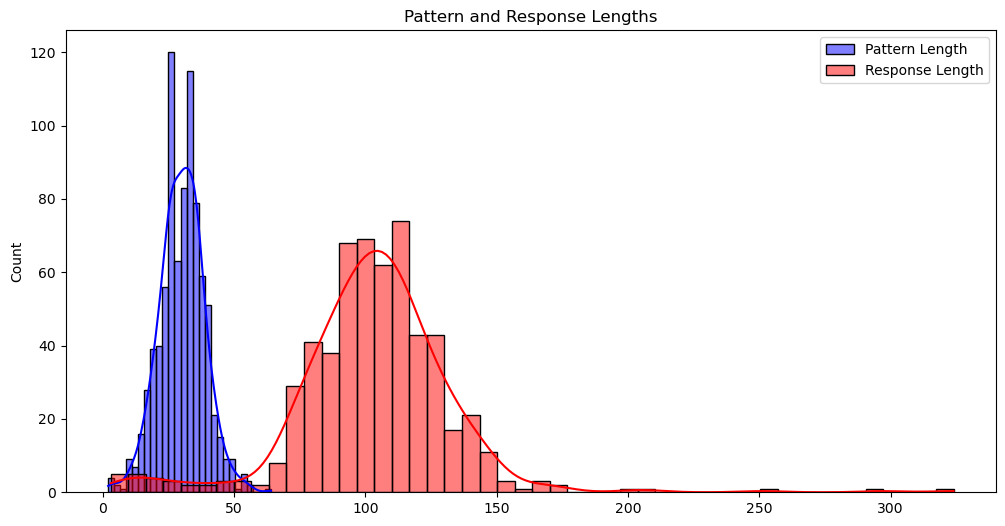

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot([length for patternlist in intents['pattern_length'] for length in patternlist], kde=True, color='blue', label='Pattern Length')
sns.histplot([length for responselist in intents['response_length'] for length in responselist], kde=True, color='red', label='Response Length')
plt.legend()
plt.title('Pattern and Response Lengths')
plt.show()

# Spliting the intents for test and training data
### Why?
To make sure a machine learning model can effectively adapt to new data, we divided the data into training and test sets.

In [15]:
from sklearn.model_selection import train_test_split

#### Now, we are going to divide 80% of the data into training data, and the remaining 20% will be our testing data.
We are going to use the train_test_split function of the Scikit-learn library, a tool for machine learning algorithms. 

In [16]:
training_data , test_data =  train_test_split(intents, test_size=0.2, random_state=42)
print("Training data:")
print(training_data.head())

Training data:
                    tag                                           patterns  \
260  enchanted_stardust  [Discovering enchanted stardust, Cosmic partic...   
124          job_search  [Tell me about job search strategies, How to w...   
33              science  [Tell me about science, What's your favorite b...   
86              dancing  [Tell me about different dance styles, How to ...   
264    enchanted_fruits  [Discovering enchanted fruits, Fruits with mys...   

                                             responses  number_of_patterns  \
260  [Enchanted stardust is a mythical substance th...                   3   
124  [Job search strategies include networking, att...                   3   
33   [Science is the systematic study of the natura...                   3   
86   [Dance styles vary from hip-hop, ballet, salsa...                   3   
264  [Enchanted fruits are mythical creations that ...                   3   

     number_of_responses pattern_length respons

In [17]:
print("Testing data")
print(test_data.head())

Testing data
                           tag  \
30                       music   
126  food_dietary_restrictions   
199          enchanted_potions   
142         social_media_detox   
253          timeless_wanderer   

                                              patterns  \
30   [What's your favorite music, Recommend me a so...   
126  [Tell me about dietary restrictions, How to ac...   
199  [Brewing enchanted potions, Ingredients for ma...   
142  [Tell me about social media detox, How to redu...   
253  [The adventures of a timeless wanderer, Roamin...   

                                             responses  number_of_patterns  \
30   [As an AI, I don't have personal preferences, ...                   3   
126  [Dietary restrictions can be due to allergies,...                   3   
199  [Enchanted potions are a common element in mag...                   3   
142  [A social media detox involves taking a break ...                   3   
253  [A timeless wanderer is a mythical fig

# Chatbot using NLP: week 2
# Now lets Train our Model
### But before that which model?
For this project we are going to be using Logistic Regression.

Logistic Regression is a statistical and machine learning model used for binary classification (i.e., classifying data into two categories). Despite its name, it is actually a classification algorithm, not a regression algorithm. Logistic Regression models the probability of a binary outcome based on one or more input features (predictors).

The core concept of logistic regression is to predict the probability that a given input belongs to a particular class.

### Why Use Logistic Regression for Intent-Based Chatbot?
An intent-based chatbot is one that understands the user's purpose or goal behind a message (e.g., "book a flight", "check the weather", "order food"). The goal of the chatbot is to classify user inputs into predefined intents (e.g., book_flight, check_weather, order_food).

Logistic Regression can be a good choice for the following reasons:
1. <b>Simplicity and Interpretability</b> : It is simple to implement and computationally efficient.
2. <b>Binary or Multi-Class Classification</b> : Regression is inherently a binary classifier. However, it can easily be extended to multi-class classification using techniques like One-vs-Rest (OvR) or Softmax Regression.
3. <b>Works Well with Text Features</b> : <b><i>Text inputs can be transformed into numerical features using techniques like TF-IDF (Term Frequency-Inverse Document Frequency).</i></b> Logistic Regression can work efficiently with these high-dimensional features, making it a good fit for text classification tasks like intent detection.
4. <b>Efficient Training</b> : Logistic Regression is computationally efficient and doesn't require complex resources.
5. <b>Good Baseline Model:</b> : Logistic Regression can serve as a good baseline model for intent classification. It is simple and quick to train.

### Below we have imported some basic utilities for Logistic Regression

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#### Some initialization.
Here we have created an Object of <b>TfidfVectorizer</b> vectorizer which is going to convert our text data to numerical data because our Model trains on Numerical data.

And a Logistic Regression object model to implement our base model.

In [13]:
vectorizer = TfidfVectorizer()
model = LogisticRegression(random_state=0,max_iter=10000)

#### Preprocessing the data
As we have read our data in the form of DataFrame we need to first convert our data in list. tags(y) and patterns(x).

In [14]:
tags = []
patterns = []
for idx,intent in intents.iterrows():
    for ptrn in intent['patterns']:
        patterns.append(ptrn)
        tags.append(intent['tag'])

Now we have vectorized our patterns using fit_transform method. and train our data using fit method of model by passing x and patterns(y) as an input.

In [15]:
x = vectorizer.fit_transform(patterns)
model.fit(x,tags)

LogisticRegression(max_iter=10000, random_state=0)

After successfully training our model.

We create a chatbot function to test the model responses to the given input.
The chatbot function take input and convert the input to vector form then predict the output using predict method and return the response given by the model.

In [16]:
import random

def chatbot(user_inp):
    user_inp_vectorized = vectorizer.transform([user_inp])
    tag = model.predict(user_inp_vectorized)[0]
    for idx,intent in intents.iterrows():
        if intent['tag'] == tag:
            response = random.choice(intent['responses'])
            return response
    return "Sorry, I didn't understand that."

In [24]:
res = chatbot("What's the time")
print(res)

You can check the time on your device or use a clock.


In [29]:
import random
asd = "abcdefghjklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789@#$%^"
password = ""
for i in range(8):
    password = password+random.choice(asd)
print(password)


WHgSF6w6


<h1>Week 3: Deploying an Intent-Based Chatbot Using Streamlit</h1>
<h2>Objective</h2>
<p>The focus of this week was to deploy the chatbot using Streamlit, enabling a user-friendly web interface to simulate human-like interactions and showcase the chatbot's intent-handling capabilities.</p>
<h2>Tasks Accomplished</h2>
<h3>Setting Up Streamlit</h3>
Installed Streamlit to create a web-based chatbot interface.
Designed the interface to support a dynamic chat-like experience where both user inputs and assistant responses are displayed.
<h3>Session State Management</h3>
Used Streamlit’s session state to persist chat messages during the user session.
This allowed for a seamless conversation flow where previous messages were retained and displayed.
<h3>Building the Chatbot Logic</h3>
Integrated a basic chatbot function to process user inputs.
While this week’s focus was deployment, the chatbot's logic could later be extended for handling intents dynamically.
<h3>Real-Time User Interaction</h3>
Implemented a real-time input field using st.chat_input for users to send messages.
Designed the chatbot to instantly respond to user queries and display messages from both the user and the assistant.
<h3>Deploying the Application</h3>
Deployed the chatbot locally using Streamlit's streamlit run command.
<h4>The interface featured:</h4>
<ul>
<li>Title Bar: A clear and concise app title: "Intent-Based ChatBot".</li>
<li>Chat Display: Display of user messages and assistant replies in a chat-like format.</li>
<li>Input Box: A text input for user queries.</li>
</ul>



<h2>Code Overview</h2>
Here’s the implemented code for the chatbot deployment:

In [ ]:
import streamlit as st

# Define the chatbot function
def chatbot(prompt):
    return f"I received your message: {prompt}"

# Streamlit app
st.title("Intent Based ChatBot")

if "messages" not in st.session_state:
    st.session_state.messages = []

# Display previous messages
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.markdown(message["content"])

# User input
prompt = st.chat_input("What's up?")
if prompt:
    # Display user message
    with st.chat_message("user"):
        st.markdown(prompt)
    st.session_state.messages.append({"role": "user", "content": prompt})

    # Generate chatbot response
    ans = chatbot(prompt)
    with st.chat_message("assistant"):
        st.markdown(ans)
    st.session_state.messages.append({"role": "assistant", "content": ans})